<h2>Logistics Regression</h2>

<h4>Binary Classification</h4>

logistics regression is use for classification problems.
The function that will be used to create graphs for logistics regression is called sigmoid function/ logit function

for sigmoid function
sigmoid(z) = 1 / 1 + e^-z

where the e is the euler number ie 2.71828

normally the line graph is y = mx + c
for logistics regression uses y = 1/1+e^-(m*x+c)

<h2>Coding Aspect </h2>

In [1]:
#loading the libraries 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("py-master/ML/7_logistic_reg/insurance_data.csv")

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0, 0.5, 'Bought Insurance')

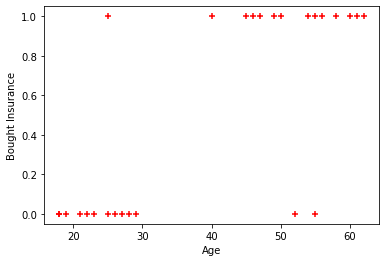

In [4]:
#plotting the above datasets 
plt.scatter(x = df["age"] , y = df["bought_insurance"] , color = "red" , marker = "+")
plt.xlabel("Age")
plt.ylabel("Bought Insurance")

In [5]:
df.count()

age                 27
bought_insurance    27
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
x_train, x_test , y_train , y_test = train_test_split(df[["age"]] , df["bought_insurance"] , test_size = 0.2 , random_state = 10)

In [8]:
len(x_train)

21

In [9]:
len(x_test)

6

In [10]:
x_train

,age
2,47
12,27
24,50
14,49
13,29
20,21
3,52
25,54
6,55
19,18


In [11]:
y_train

2     1
12    0
24    1
14    1
13    0
20    0
3     0
25    1
6     0
19    0
10    0
23    1
26    0
8     1
22    1
16    1
17    1
0     0
15    1
4     1
9     1
Name: bought_insurance, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()

In [14]:
lr.fit(x_train , y_train)

LogisticRegression()

In [15]:
lr.predict(x_test)

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [16]:
lr.score(x_test , y_test)

1.0

In [17]:
lr.predict_proba(x_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

<H2>EXERCISE</H2>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
Lr = LogisticRegression()

In [20]:
datasets = pd.read_csv("py-master/ML/7_logistic_reg/Exercise/HR_comma_sep.csv")

In [21]:
datasets.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
datasets.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

In [23]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
#write a function that will show corr between left and others
datasets.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [25]:
#analysis on the number of people retented 
datasets[datasets.left == 0 ].shape

(11428, 10)

In [26]:
datasets[(datasets.left == 1)&(datasets.salary == "low" ) ].shape

(2172, 10)

In [27]:
datasets.left.count()

14999

<AxesSubplot:xlabel='salary'>

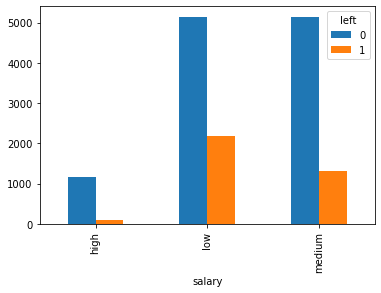

In [28]:
#checking on the analysis in the number of employees retented by salary
pd.crosstab(datasets['salary'] , datasets['left']).plot(kind = "bar")


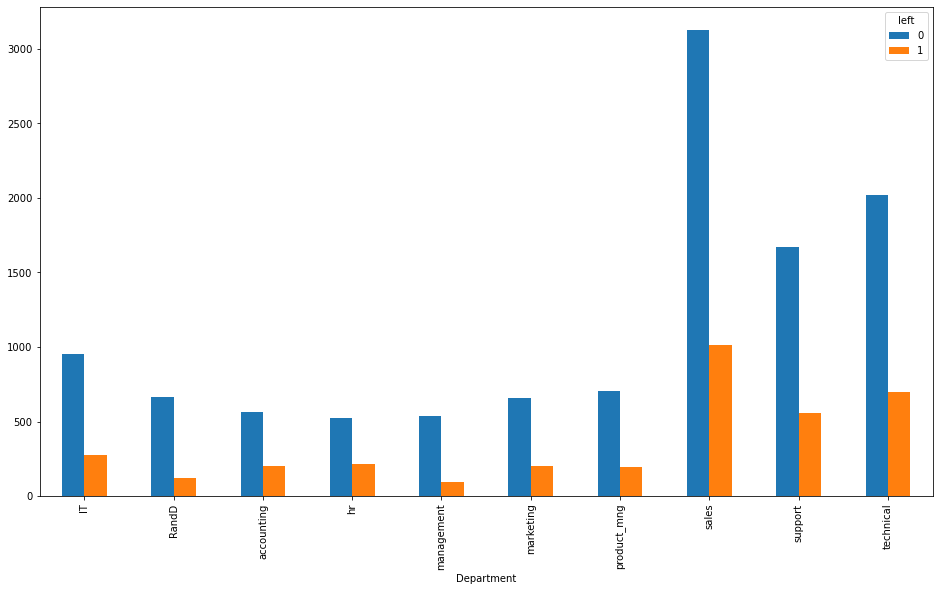

In [29]:
#checking on the analysis in the number of employees retented by department 
pd.crosstab(datasets['Department'] , datasets['left']).plot(kind = "bar")
plt.gcf().set_size_inches(16,9)

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [31]:
le = LabelEncoder()

In [32]:
datasets["Department"] = le.fit_transform(datasets["Department"])

In [33]:
datasets["Department"]

0        7
1        7
2        7
3        7
4        7
        ..
14994    8
14995    8
14996    8
14997    8
14998    8
Name: Department, Length: 14999, dtype: int32

In [34]:
datasets["salary"] = le.fit_transform(datasets["salary"])

In [35]:
datasets["salary"]

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int32

In [36]:
X = datasets[["satisfaction_level" , "average_montly_hours" ,"promotion_last_5years" , "salary"]].values
X

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 2.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 2.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 1.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 1.00e+00]])

In [37]:
y = datasets.iloc[:,6].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
#using the train-test-split method
X_train , X_test , Y_train , Y_test = train_test_split(X,y , test_size = 0.3 )

In [39]:
lr.fit(X_train , Y_train)

LogisticRegression()

In [40]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [41]:
lr.score(X_test , Y_test)

0.7595555555555555